

## Aprendizaje automático en Python (I) - Rafael Caballero


## Naïve Bayes

Tenemos datos sobre mails y sobre si son o no SPAM (obtenidos de [aquí](https://www.codingninjas.com/codestudio/library/bernoulli-naive-bayes) )

In [4]:
import pandas as pd
import numpy as np  
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.naive_bayes import BernoulliNB 
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline


#### Carga y preprocesado
path = "https://raw.githubusercontent.com/amankharwal/SMS-Spam-Detection/master/spam.csv"
#path = "c:/hlocal/tdm/movimiento.csv"
df = pd.read_csv(path,encoding="latin1").drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


**Ejercicio** ¿cuántos valores diferentes tiene la columna class?

array(['ham', 'spam'], dtype=object)

Crear una nueva columna `label`que valga 1 si `class`es 'spam' y 0 en otro caso

In [23]:
df["label"]=0
df.loc[df["class"]=="spam","label"] =1

Ahora quitamos las palabrs comunes (stopwords), signos de puntuación, etc.

In [24]:
import spacy
nlp = spacy.blank('en')
stopwords = nlp.Defaults.stop_words

l = [" ".join([token.text.upper() for token in nlp(doc) if not token.is_stop and  token.is_alpha]) for doc in df.message]

df["limpio"] = l
df

,class,message,limpio,label
0,ham,"Go until jurong point, crazy.. Available only ...",JURONG POINT CRAZY AVAILABLE BUGIS N GREAT WOR...,0
1,ham,Ok lar... Joking wif u oni...,OK LAR JOKING WIF U ONI,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,FREE ENTRY WKLY COMP WIN FA CUP FINAL TKTS TEX...,1
3,ham,U dun say so early hor... U c already then say...,U DUN EARLY HOR U C,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",NAH THINK GOES USF LIVES,0
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,TIME TRIED CONTACT U WON POUND PRIZE CLAIM EAS...,1
5568,ham,Will Ì_ b going to esplanade fr home?,Ì B GOING ESPLANADE FR HOME,0
5569,ham,"Pity, * was in mood for that. So...any other s...",PITY MOOD SUGGESTIONS,0
5570,ham,The guy did some bitching but I acted like i'd...,GUY BITCHING ACTED LIKE INTERESTED BUYING WEEK...,0


Tenemos que convertir las palabras en columnas. El método `CountVectorizer`

In [40]:
frases =df["limpio"].values 
y = df["label"].values
# creating count vectorizer object 
cv = CountVectorizer()
#tranforming values 
X = cv.fit_transform(frases)
v= x.toarray()
#printing sparse matrix 
print(v.shape)
v

(5572, 7011)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [22]:
(v[1]!=0).sum()

5

Ahora probamos los distintos métodos basados en Naïve Bayes

kappa  0.8457791357812301


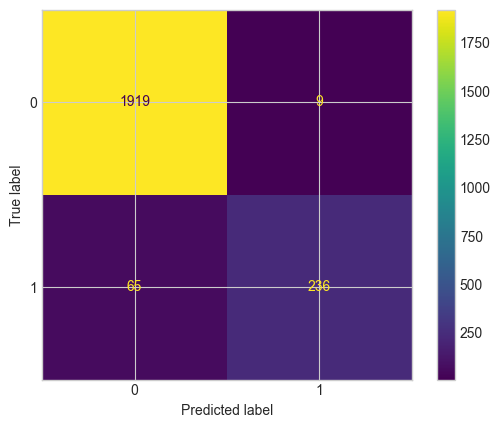

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1928
           1       0.96      0.78      0.86       301

    accuracy                           0.97      2229
   macro avg       0.97      0.89      0.92      2229
weighted avg       0.97      0.97      0.97      2229



In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 2 preparar train y test
test = 0.4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= test)

# 3 método y entrenamiento
metodo = BernoulliNB()
modelo = metodo.fit(X_train,y_train)

# 4 evaluar 
y_pred = modelo.predict(X_test)
k =  cohen_kappa_score(y_test,y_pred)
print("kappa ",k)
cm = confusion_matrix(y_test, y_pred, labels=modelo.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.classes_)
disp.plot()

plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

**Pregunta** En el caso del SPAM, ¿Es mejor tener una precisión alta y  un recall un poco más bajo o al revés?

**Ejercicio** Queremos probar a obtener el coeficiente kappa con `BernoulliNB`con `RandomOverSampler` (repitiendo los valores menos frecuentes, los del Spam) y validación cruzada

Buscar al final del notebook Pipelines, copiar, pegar y hacer los cambios que correspondan

0.9271375907678777

**Ejercicio** probar ahora con regresión logística

**Ejercicio** Probar con SMOTE ¿puedes explicar el resultado?

**Ejercicio** Probar con otros métodos SVM, RandomForest...